In [34]:
from xgboost import XGBClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
modelA1 = XGBClassifier(use_label_encoder=False, max_depth=3)

modelA1.load_model("./Models/xgboost_modelA1.json")

In [36]:
ft = modelA1.feature_importances_

important_peptide_indices = np.where(ft > 0)[0]

top_peptidoform_indices_and_weights = list(zip(important_peptide_indices, ft[important_peptide_indices]))
sorted(top_peptidoform_indices_and_weights, key = lambda item: item[1], reverse=True)

[(48752, 0.035576444),
 (3465, 0.026449041),
 (41913, 0.024086714),
 (48362, 0.021413233),
 (1597, 0.016882451),
 (43060, 0.016532043),
 (2192, 0.015103743),
 (43514, 0.014796257),
 (49902, 0.014442246),
 (43188, 0.013427658),
 (41823, 0.013020268),
 (2267, 0.012998587),
 (15598, 0.0125674885),
 (45771, 0.012226116),
 (5302, 0.011941885),
 (3294, 0.011622106),
 (43487, 0.011609708),
 (52431, 0.0114787),
 (50882, 0.011307771),
 (918, 0.011110106),
 (47645, 0.010728993),
 (5277, 0.010100055),
 (47514, 0.009531243),
 (7732, 0.009296159),
 (42550, 0.008977827),
 (42881, 0.008789306),
 (1321, 0.008369183),
 (11510, 0.008359357),
 (9049, 0.008338531),
 (44449, 0.007766961),
 (3827, 0.007600714),
 (43727, 0.0075835143),
 (18281, 0.007314367),
 (51407, 0.007072201),
 (43683, 0.006887708),
 (9309, 0.0068270233),
 (44228, 0.0066279625),
 (259, 0.0065209386),
 (12481, 0.0064592934),
 (42781, 0.006438776),
 (4230, 0.00602694),
 (9973, 0.0059025483),
 (1560, 0.0057165227),
 (60001, 0.0056871786),
 

In [49]:
original_data_df = pd.read_csv("./Data/peptidoforms_intensity/data.tsv", sep="\t")
original_data_df.keys()

important_data_df = pd.read_csv("./Models/important_peptidoforms_selected_by_xgboost.csv")
important_data_df.keys()

Index(['Peptidoform', 'Peptidoform ID', 'Unmod peptidoform', 'Total',
       'Total- Unmodified sequence', 'Peptidoforms- Unmodified sequence',
       'Proteins', 'Mass', 'Charge', 'Num Mods',
       ...
       'Patient_57.Timepoint_6', 'Patient_57.Timepoint_7',
       'Patient_58.Timepoint_1', 'Patient_58.Timepoint_2',
       'Patient_58.Timepoint_3', 'Patient_58.Timepoint_4',
       'Patient_58.Timepoint_5', 'Patient_58.Timepoint_6',
       'Patient_58.Timepoint_7', 'model_weight'],
      dtype='object', length=351)

In [38]:
print(original_data_df.keys())

Index(['Peptidoform', 'Peptidoform ID', 'Unmod peptidoform', 'Total',
       'Total- Unmodified sequence', 'Peptidoforms- Unmodified sequence',
       'Proteins', 'Mass', 'Charge', 'Num Mods',
       ...
       'Patient_M2_healthyMale.Timepoint_2',
       'Patient_M2_healthyMale.Timepoint_2_unmod',
       'Patient_M2_healthyMale.Timepoint_3',
       'Patient_M2_healthyMale.Timepoint_3_unmod',
       'Patient_M3_healthyMale.Timepoint_1',
       'Patient_M3_healthyMale.Timepoint_1_unmod',
       'Patient_M3_healthyMale.Timepoint_2',
       'Patient_M3_healthyMale.Timepoint_2_unmod',
       'Patient_M3_healthyMale.Timepoint_3',
       'Patient_M3_healthyMale.Timepoint_3_unmod'],
      dtype='object', length=704)


(186, 59)


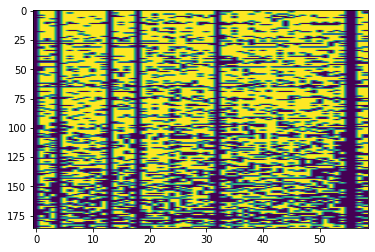

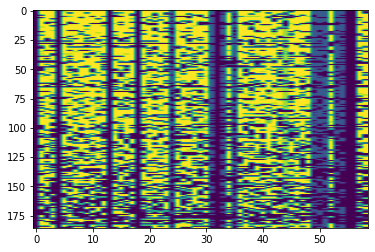

(186,)

In [74]:
def IsPatientKey( key , pid = None):
    prefix = "Patient_"
    if pid != None:
        prefix += f"{pid:02d}"
    if key.startswith(prefix) and not key.endswith("_unmod") and not key.startswith("Patient_M") and not key.startswith("Patient_F"):
        return True
    return False

re = pd.DataFrame({str(i):[] for i in range(59)})
count = pd.DataFrame({str(i):[] for i in range(59)})
for i in range(59):
    header_mask = [IsPatientKey(k, i) for k in important_data_df.keys()]

    selected_data = important_data_df.loc[:,header_mask] 

    pep_exist = selected_data.notna().sum(axis = 1) != 0
    count_appear = selected_data.notna().sum(axis = 1)

    re[str(i)] = pep_exist
    count[str(i)] = count_appear

pep_patient_count = re.sum(axis = 1)
pep_patient_count.name = "num_of_patient_have_this_pep"

pep_appear_count = count.sum(axis = 1)
pep_appear_count.name = "num_of_times_this_pep_appear"


print(re.shape)
plt.imshow(re,aspect='auto')
plt.show()
plt.imshow(count,aspect='auto')
plt.show()

pep_patient_count.shape

7491


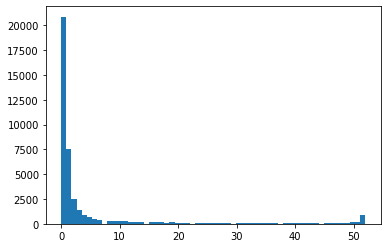

In [40]:
pep_index_with_only_one_patient = (pep_patient_count.index[pep_patient_count == 1].tolist())
print(len(pep_index_with_only_one_patient))

plt.hist( pep_patient_count, bins=59)
plt.show()

In [41]:
pep_name_patient_count = original_data_df['Peptidoform'].to_frame().join(pep_patient_count).join(pep_appear_count)
print(pep_name_patient_count)

Peptidoform  \
0                                       .SPLFM+15.995GK.   
1                              .EPQVYTLPPSREEM+15.995TK.   
2                                  .AVM+15.995DDFAAFVEK.   
3                           .EFNAETFTFHADIC-33.988TLSEK.   
4                            .M+15.995ADEAGSEADHEGTHSTK.   
...                                                  ...   
40916                 .+100.016PQAPALWIETTAYALLHLLLHEGK.   
40917                            .+100.016GSEADHEGTHSTK.   
40918  .-0.979EVT+13.032EFAKTC+57.021VADESAENC+57.021DK.   
40919       .-0.979EK+111.032HKVYAC+57.021EVTHQGLSSPVTK.   
40920          .-0.979EFN-17.027AETFTFHADIC+57.021TLSEK.   

       num_of_patient_have_this_pep  num_of_times_this_pep_appear  
0                                52                         318.0  
1                                52                         318.0  
2                                52                         318.0  
3                                52                 

In [51]:
reference_data = pd.merge(pep_name_patient_count, important_data_df[['Peptidoform', "model_weight"]], on="Peptidoform", how="outer")

print(reference_data)

Peptidoform  \
0                                       .SPLFM+15.995GK.   
1                              .EPQVYTLPPSREEM+15.995TK.   
2                                  .AVM+15.995DDFAAFVEK.   
3                           .EFNAETFTFHADIC-33.988TLSEK.   
4                            .M+15.995ADEAGSEADHEGTHSTK.   
...                                                  ...   
40916                 .+100.016PQAPALWIETTAYALLHLLLHEGK.   
40917                            .+100.016GSEADHEGTHSTK.   
40918  .-0.979EVT+13.032EFAKTC+57.021VADESAENC+57.021DK.   
40919       .-0.979EK+111.032HKVYAC+57.021EVTHQGLSSPVTK.   
40920          .-0.979EFN-17.027AETFTFHADIC+57.021TLSEK.   

       num_of_patient_have_this_pep  num_of_times_this_pep_appear  \
0                                52                         318.0   
1                                52                         318.0   
2                                52                         318.0   
3                                52             

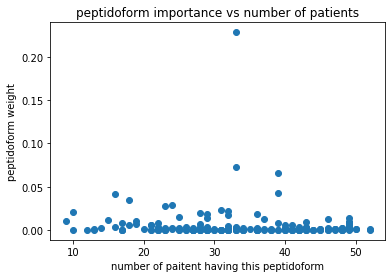

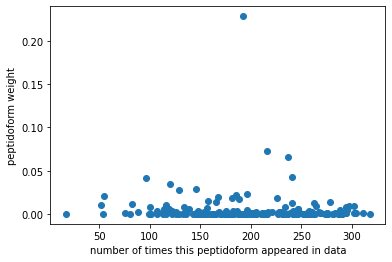

In [72]:
plt.scatter(reference_data["num_of_patient_have_this_pep"], reference_data["model_weight"])
plt.title("peptidoform importance vs number of patients")
plt.xlabel("number of paitent having this peptidoform")
plt.ylabel("peptidoform weight")
plt.savefig("weight_v_num_paitents.png")
plt.show()
plt.scatter(reference_data["num_of_times_this_pep_appear"], reference_data["model_weight"])
plt.xlabel("number of times this peptidoform appeared in data")
plt.ylabel("peptidoform weight")
plt.show()

Text(0, 0.5, 'num importent peptidoform')

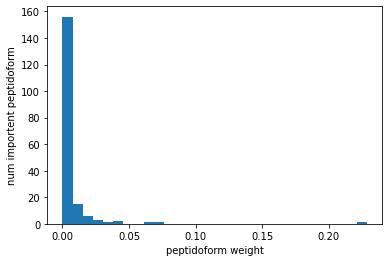

In [53]:
hist_data = plt.hist(reference_data["model_weight"],bins=30)
plt.xlabel("peptidoform weight")
plt.ylabel("num importent peptidoform")

In [63]:
interval = hist_data[1]

after = interval[0]
num_patient_in_weight = []
header_mask = [IsPatientKey(k) for k in original_data_df.keys()]
header_mask[0] = True

for i in interval[1:]: 
    pep_df_in_weight = reference_data[ np.logical_and( reference_data["model_weight"] > after ,reference_data["model_weight"] <= i )]
    if pep_df_in_weight.empty:
        num_patient_in_weight.append(0)
        continue
    pep_in_weight_range = pep_df_in_weight["Peptidoform"]
    pep_in_weight_range.name = "Peptidoform"
    temp = pd.merge(original_data_df.loc[:,header_mask], pep_in_weight_range.to_frame(), on="Peptidoform")
    del temp["Peptidoform"]

    num_patient = 0
    count = pd.DataFrame({str(i):[] for i in range(59)})
    for j in range(59):
        header_mask_patient = [IsPatientKey(k, j) for k in temp.keys()]
        selected_data = temp.loc[:,header_mask_patient] 
        count[int(j)] = selected_data.notna().sum(axis = 1) != 0    

    count = sum(count.sum(axis = 1))
    print(temp.shape, count)
    num_patient_in_weight.append(count)
    after = i
print(num_patient_in_weight)

(155, 318) 5282.0
(15, 318) 497.0
(6, 318) 167.0
(3, 318) 78.0
(1, 318) 18.0
(2, 318) 55.0
(1, 318) 39.0
(1, 318) 33.0
(1, 318) 33.0
[5282.0, 497.0, 167.0, 78.0, 18.0, 55.0, 0, 0, 39.0, 33.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 33.0]


[5282.0, 497.0, 167.0, 78.0, 18.0, 55.0, 0, 0, 39.0, 33.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 33.0]


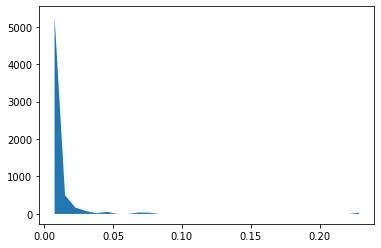

In [71]:
print(num_patient_in_weight)
plt.fill_between(interval[1:], num_patient_in_weight, )

In [157]:
weght_range_mask = important_data_df[['Peptidoform', "model_weight"]]

In [170]:
filtered_data_df = pd.read_csv("./Data/canonical_data.csv")

In [183]:
temp_fil_data = pd.merge(filtered_data_df[["Peptidoform","Proteins"]],weght_range_mask ,on="Peptidoform", how="outer")

In [184]:
from collections import defaultdict
import math

In [281]:
importent_proteins_weights = defaultdict(list)
imp_pro = set()
count = 0
for i, row in temp_fil_data.iterrows():
    if not math.isnan(row["model_weight"]) and type(row["Proteins"]) == str :
        for p in row["Proteins"].split(';'):
            imp_pro.add(p)
            count += 1
            importent_proteins_weights[p].append(row["model_weight"])
print(count)
print(len(importent_proteins_weights))
print(len(imp_pro))

462
115
115


In [208]:

protein_imp_percent = []
importent_pep_protein_imp_percent = []
for i, row in temp_fil_data.iterrows():
    if type(row["Proteins"]) != str or not math.isnan(row["model_weight"]): #skip no proteins or is important
        continue
    temp_count = 0
    for p in row["Proteins"].split(';'):
        if p in imp_pro:
            temp_count += 1
    protein_imp_percent.append( temp_count/len(row["Proteins"].split(';')))
    # if not math.isnan(row["model_weight"]): # is importent
    #     importent_pep_protein_imp_percent.append( temp_count/len(row["Proteins"].split(';')))

In [209]:
print(len(protein_imp_percent))

39910


Text(0, 0.5, 'number of peptidoform')

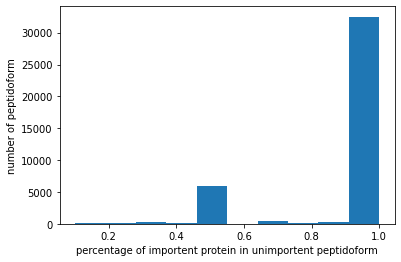

In [212]:
plt.hist(protein_imp_percent)
plt.xlabel("percentage of importent protein in unimportent peptidoform")
plt.ylabel("number of peptidoform")

In [201]:
sum(temp_fil_data["Proteins"].isna()) / len(temp_fil_data["Proteins"])

0.02023410962586447

In [220]:
top_25 = weght_range_mask.sort_values("model_weight", ascending = False)[:25]

In [271]:
top_25_data = pd.merge(original_data_df,top_25 ,on="Peptidoform", how="right")
header_mask = [IsPatientKey(k) for k in top_25_data.keys()]
top_25_data = top_25_data.fillna("0")
for title, ser in top_25_data.iteritems():
    if IsPatientKey(title):
        top_25_data[title] = top_25_data[title].str.replace(',', '')
        top_25_data[title] = top_25_data[title].astype(int)

In [308]:
raw_data = np.log(top_25_data.loc[:,header_mask]).replace([np.inf, -np.inf],0)
plt.imshow(raw_data, aspect = "auto")
mycmap = plt.cm.jet
for entry in pl.unique(raw_data):
    mycolor = mycmap(entry*255/(max(raw_data) - min(raw_data)))
    plt.plot(0, 0, "-", c=mycolor, label="test")
plt.show()

NameError: name 'pl' is not defined

In [293]:
np.log(0)

-inf